<a href="https://colab.research.google.com/github/LSH-LC/datajo/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터조 발표 자료

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [ ]:
!git clone https://github.com/jiho050718/datajo

Cloning into 'datajo'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 82 (delta 30), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (82/82), 4.67 MiB | 5.14 MiB/s, done.
Resolving deltas: 100% (30/30), done.


## CSV 불러와서 일부 출력

In [ ]:
# CSV 파일 불러오기
df = pd.read_csv("datajo/titanic1309.csv")
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,NaN,S
191,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
680,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q


## 데이터 프레임으로 저장 후 칼럼 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


## 타이타닉 열(변수) 설명

| 변수명        | 설명                                                         |
| ------------- | ------------------------------------------------------------ |
| `PassengerId` | 승객 고유 번호 (각 사람을 구별하는 ID)                      |
| `Survived`    | 생존 여부 (0 = 사망, 1 = 생존)                               |
| `Pclass`      | 객실 등급 (1 = 1등석, 2 = 2등석, 3 = 3등석)                  |
| `Name`        | 승객 이름 (예: Mr. John Smith)                              |
| `Sex`         | 성별 (`male` = 남자, `female` = 여자)                      |
| `Age`         | 나이 (정수 또는 실수, 일부 결측값 존재)                      |
| `SibSp`       | 함께 탄 형제자매 또는 배우자 수                              |
| `Parch`       | 함께 탄 부모 또는 자녀 수                                   |
| `Ticket`      | 티켓 번호 (탑승권 번호)                                      |
| `Fare`        | 운임 요금 (티켓 가격)                                        |
| `Cabin`       | 선실 번호 (많은 결측값 존재)                                |
| `Embarked`    | 탑승한 항구 (`C`=셰르부르, `Q`=퀸스타운, `S`=사우샘프턴) |

# 생존율

## 좌석별 생존율

In [ ]:
# 1등석 데이터 필터링
second_class = df[df['Pclass'] == 1]

# 통계 계산
total_passengers = len(second_class)
survivors = second_class['Survived'].sum()
calculated_rate = (survivors / total_passengers) * 100

# 세로 데이터프레임 생성
result_df = pd.DataFrame({
    '항목': ['1등석 총 승객 수', '1등석 생존자 수', '1등석 생존율 (%)'],
    '값': [total_passengers, survivors, round(calculated_rate, 2)]
})

# 데이터프레임 출력
result_df

,항목,값
0,1등석 총 승객 수,323.00
1,1등석 생존자 수,186.00
2,1등석 생존율 (%),57.59


In [ ]:
# 2등석 데이터 필터링
second_class = df[df['Pclass'] == 2]

# 통계 계산
total_passengers = len(second_class)
survivors = second_class['Survived'].sum()
calculated_rate = (survivors / total_passengers) * 100

# 세로 데이터프레임 생성
result_df = pd.DataFrame({
    '항목': ['2등석 총 승객 수', '2등석 생존자 수', '2등석 생존율 (%)'],
    '값': [total_passengers, survivors, round(calculated_rate, 2)]
})

# 데이터프레임 출력
result_df

,항목,값
0,2등석 총 승객 수,277.00
1,2등석 생존자 수,117.00
2,2등석 생존율 (%),42.24


In [ ]:
# 3등석 데이터 필터링
second_class = df[df['Pclass'] == 3]

# 통계 계산
total_passengers = len(second_class)
survivors = second_class['Survived'].sum()
calculated_rate = (survivors / total_passengers) * 100

# 세로 데이터프레임 생성
result_df = pd.DataFrame({
    '항목': ['3등석 총 승객 수', '3등석 생존자 수', '3등석 생존율 (%)'],
    '값': [total_passengers, survivors, round(calculated_rate, 2)]
})

# 데이터프레임 출력
result_df

,항목,값
0,3등석 총 승객 수,709.00
1,3등석 생존자 수,191.00
2,3등석 생존율 (%),26.94


### 좌석별 생존율 시각화

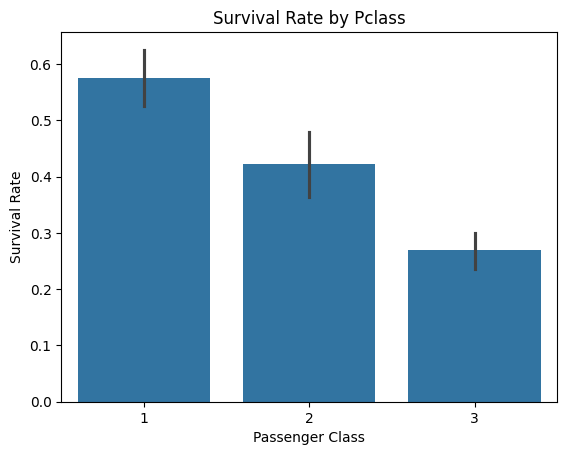

In [ ]:
# 시각화
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

## 나이별 생존율

In [ ]:
# 나이를 10세 단위로 범주화
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
                        labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'],
                        include_lowest=True)

# 나이 그룹별 생존율 계산
age_survival_rate = df.groupby('AgeGroup', observed=True)['Survived'].agg(['count', 'sum', 'mean'])
age_survival_rate['Survival Rate (%)'] = age_survival_rate['mean'] * 100
age_survival_rate = age_survival_rate[['count', 'sum', 'Survival Rate (%)']].round(2)
age_survival_rate.columns = ['Total Passengers', 'Survivors', 'Survival Rate (%)']

# 데이터프레임 표로 출력
print("\n전체 나이 그룹별 생존율:")
print(age_survival_rate.to_string())


전체 나이 그룹별 생존율:
          Total Passengers  Survivors  Survival Rate (%)
AgeGroup                                                
0-10                    86         48              55.81
10-20                  162         66              40.74
20-30                  361        129              35.73
30-40                  210         89              42.38
40-50                  132         48              36.36
50-60                   62         28              45.16
60-70                   27          7              25.93
70-80                    6          2              33.33


### 나이별 생존율 시각화

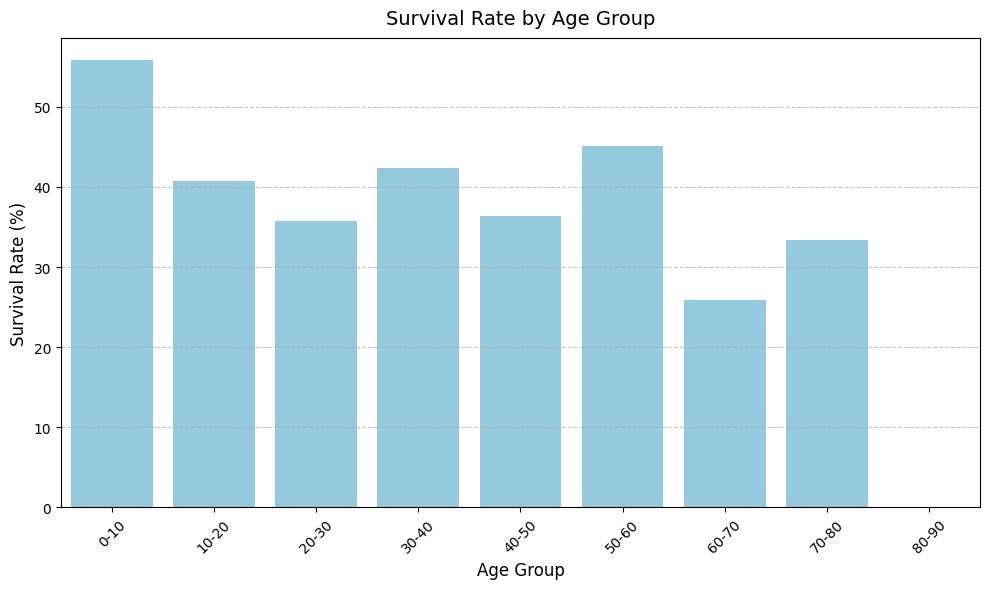

In [ ]:
# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=age_survival_rate.index, y=age_survival_rate['Survival Rate (%)'], color='skyblue')
plt.title('Survival Rate by Age Group', fontsize=14, pad=10)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 성별별 생존율

In [ ]:
# 성별별 생존율 계산
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100

# 결과 출력
print("성별별 생존율 (%):")
print(survival_by_sex)

성별별 생존율 (%):
Sex
female    82.618026
male      12.930012
Name: Survived, dtype: float64


### 성별별 생존율 시각화

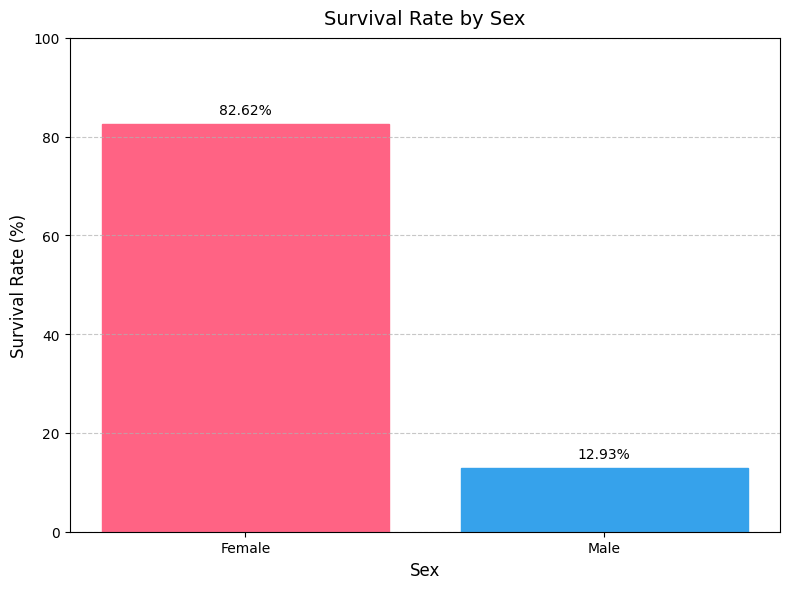

In [ ]:
# 데이터 준비
labels = ['Female', 'Male']
survival_rates = [survival_by_sex['female'], survival_by_sex['male']]
colors = ['#FF6384', '#36A2EB']  # 여성: 핑크, 남성: 파랑

# 막대 차트 생성
plt.figure(figsize=(8, 6))  # 차트 크기 (너비 8인치, 높이 6인치)
plt.bar(labels, survival_rates, color=colors, edgecolor=colors, linewidth=1)

# 차트 설정
plt.title('Survival Rate by Sex', fontsize=14, pad=10)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.ylim(0, 100)  # Y축 범위 0~100%
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Y축 그리드 추가

# 값 레이블 추가 (각 막대 위에 생존율 표시)
for i, rate in enumerate(survival_rates):
    plt.text(i, rate + 2, f'{rate:.2f}%', ha='center', fontsize=10)

# 차트 표시
plt.tight_layout()
plt.show()

## 연령대와 성별에 따른 생존율

In [ ]:
# 성별 및 연령대별 생존율 계산
sex_age_survival = df.groupby(['Sex', 'AgeGroup'], observed=True)['Survived'].mean().reset_index()
sex_age_survival['Survived'] *= 100

# 열과 행 지정
pivot_table = sex_age_survival.pivot_table(index='AgeGroup', columns='Sex', values='Survived', observed=True)

# 출력
print("연령대와 성별에 따른 생존율 (%):")
print(pivot_table)

연령대와 성별에 따른 생존율 (%):
Sex           female       male
AgeGroup                       
0-10       70.731707  42.222222
10-20      82.352941  10.638298
20-30      84.126984   9.787234
30-40      88.000000  17.037037
40-50      78.260870  13.953488
50-60      96.000000  10.810811
60-70     100.000000   4.761905
70-80     100.000000  20.000000


### 연령대와 성별에 따른 생존율 시각화

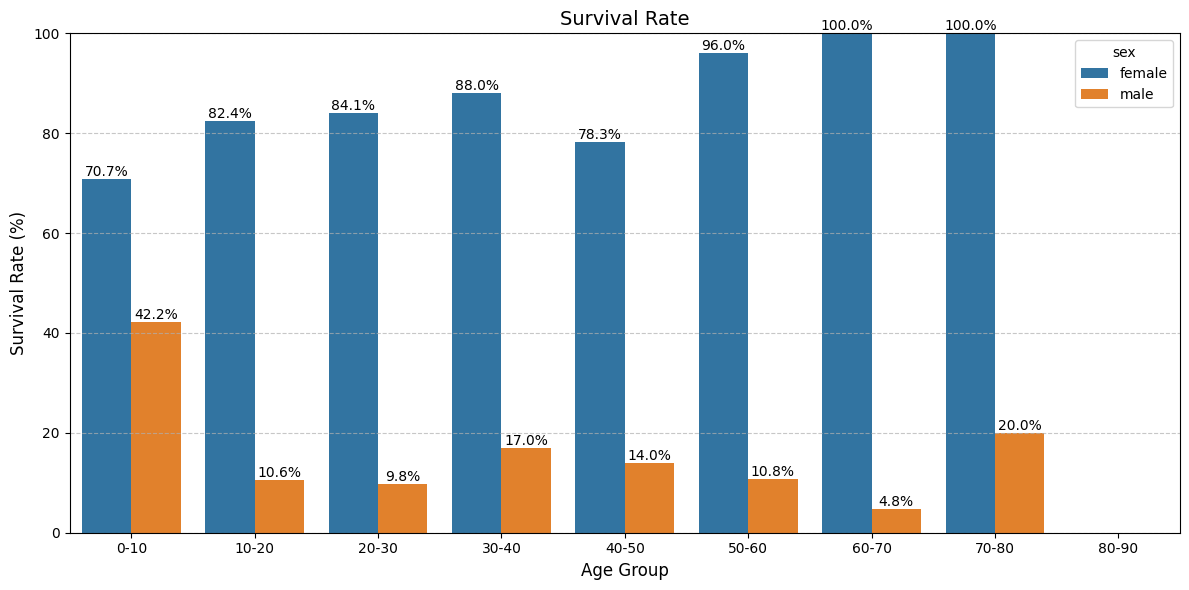

In [ ]:
# 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sex_age_survival, x='AgeGroup', y='Survived', hue='Sex')
plt.title('Survival Rate', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='sex', fontsize=10)
plt.tight_layout()

# 막대 그래프 위에 % 숫자 추가
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.show()

## 탑승한 항구별 인원

In [ ]:
# 항구별 인원수 데이터프레임 생성
embarked_counts_df = df["Embarked"].value_counts().reset_index()
embarked_counts_df.columns = ["항구", "탑승 인원"]

# 결과 출력
embarked_counts_df

,항구,탑승 인원
0,S,914
1,C,270
2,Q,123


### 탑승한 항구별 인원 시각화

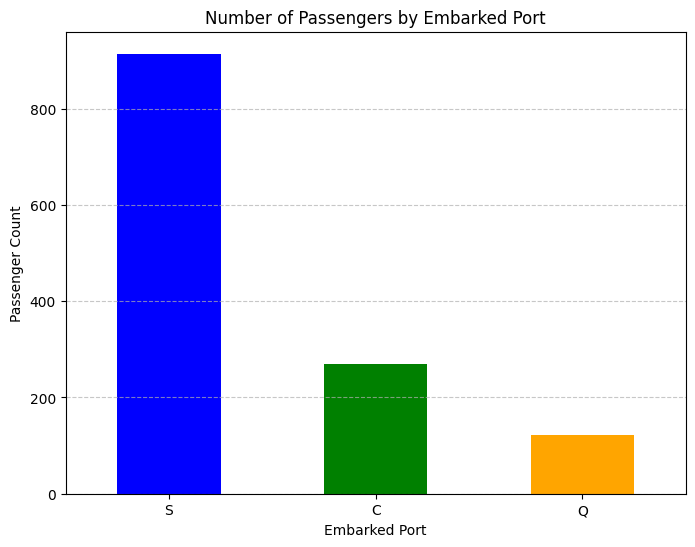

In [ ]:
# 항구별 탑승 인원 계산
embarked_counts = df['Embarked'].value_counts()

# 시각화
plt.figure(figsize=(8,6))
embarked_counts.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.xlabel("Embarked Port")
plt.ylabel("Passenger Count")
plt.title("Number of Passengers by Embarked Port")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 표시
plt.show()

# 자유 데이터

## CSV 불러와서 일부 출력

In [ ]:
# 1. CSV 파일 불러오기
df1 = pd.read_csv("datajo/cardata_english.csv")
df1.sample(3)

,월(Monthly),시도명,시군구,승용_관용,승용_자가용,승용_영업용,승용_합계,승합_관용,승합_자가용,승합_업무용,...,화물_영업용,화물_합계,특수_관용,특수_자가용,특수영업용,특수_합계,총계_관용,총계_자가용,총계_영업용,총계_합계
2894,22-Feb,Jeonnam,해남군,111,"23,320","37,870","61,301",84,"1,671",667,...,240,"15,220",17,104,30,151,346,"39,941","38,807","79,094"
1406,21-Sep,Gwangju,북구,179,"162,573","4,368","167,120",221,"4,443",947,...,"3,160","26,355",16,379,504,899,601,"190,405","8,979","199,985"
714,21-Jun,Jeonbuk,고창군,102,"18,774",182,"19,058",60,"1,338",92,...,268,"10,595",7,75,40,122,301,"30,382",582,"31,265"


## 칼럼 확인

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13202 entries, 0 to 13201
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   월(Monthly)  13202 non-null  object
 1   시도명         13202 non-null  object
 2   시군구         13202 non-null  object
 3   승용_관용       13202 non-null  object
 4   승용_자가용      13202 non-null  object
 5   승용_영업용      13202 non-null  object
 6   승용_합계       13202 non-null  object
 7   승합_관용       13202 non-null  object
 8   승합_자가용      13202 non-null  object
 9   승합_업무용      13202 non-null  object
 10  승합_합계       13202 non-null  object
 11  화물_관용       13202 non-null  object
 12  화물_자가용      13202 non-null  object
 13  화물_영업용      13202 non-null  object
 14  화물_합계       13202 non-null  object
 15  특수_관용       13202 non-null  int64 
 16  특수_자가용      13202 non-null  object
 17  특수영업용       13202 non-null  object
 18  특수_합계       13202 non-null  object
 19  총계_관용       13202 non-null  object
 20  총계_자가용

## 총계

In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['총계_합계'] = df1['총계_합계'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['총계_합계'].sum(),
    '2025': df_2025.groupby('시도명')['총계_합계'].sum()
}).reset_index()

# 증감량 계산
agg_data['증감량'] = agg_data['2025'] - agg_data['2021']

# 증감량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증감량', ascending=False)

# 데이터프레임 출력
print("\n총계_합계 증감량 데이터프레임 :")
agg_data


총계_합계 증감량 데이터프레임 :


,시도명,2021,2025,증감량
8,Gyeonggi,12144576,13324214,1179638
9,Gyeongnam,3611828,3982174,370346
13,Jeonnam,2258804,2581414,322610
0,Busan,2880472,3141284,260812
2,Chungnam,2319888,2558746,238858
11,Jeju,1259792,1423950,164158
1,Chungbuk,1749944,1903918,153974
10,Incheon,3348626,3501406,152780
7,Gyeongbuk,2974290,3113776,139486
5,Gangwon,1629844,1752708,122864


<ipython-input-54-31852231323c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=change_df.index, y=change_df['변화량(대)'], palette='viridis')


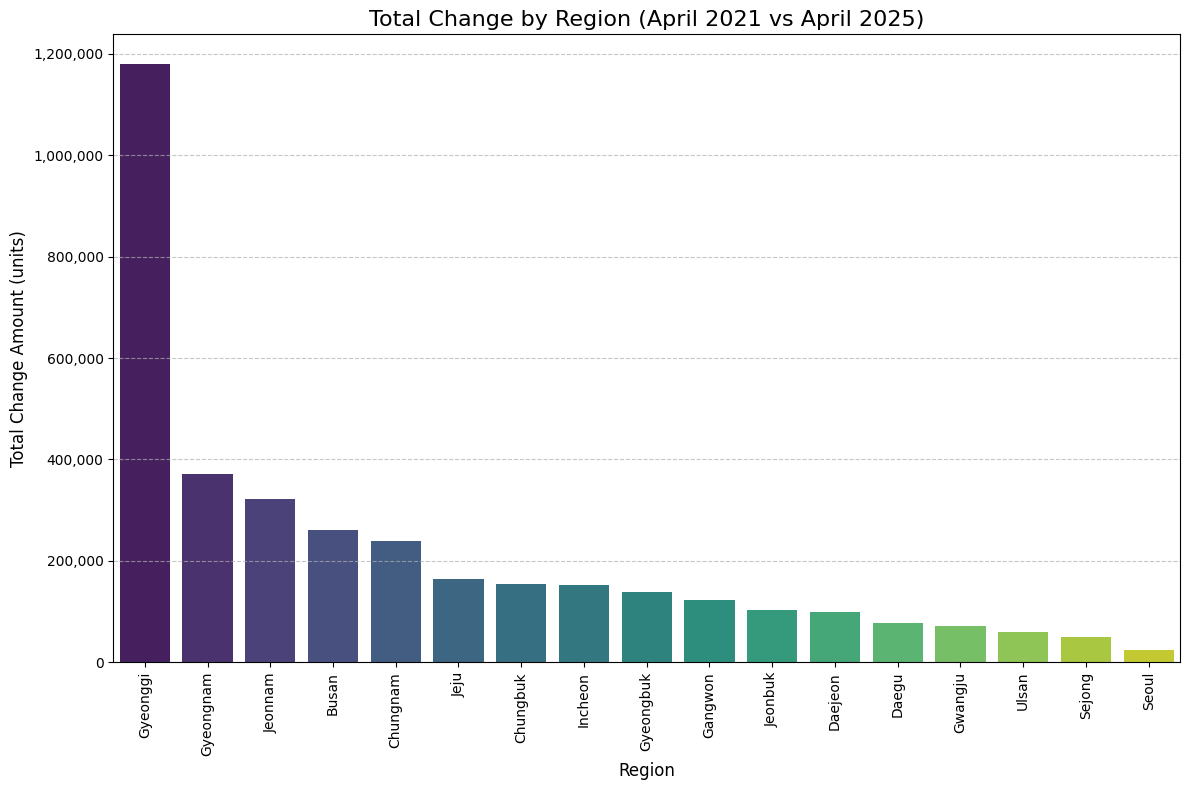

In [ ]:
# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=change_df.index, y=change_df['변화량(대)'], palette='viridis')
plt.title('Total Change by Region (April 2021 vs April 2025)', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Change Amount (units)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

## 자가용

In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['승용_자가용'] = df1['승용_자가용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['승용_자가용'].sum(),
    '2025': df_2025.groupby('시도명')['승용_자가용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n승용_자가용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


승용_자가용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,9909280,11028690,1119410
11,인천,2260668,2555048,294380
2,경남,2732088,3019416,287328
15,충남,1747512,1965734,218222
7,부산,2225028,2385348,160320
12,전남,1392370,1540816,148446
16,충북,1331604,1472690,141086
3,경북,2188478,2327866,139388
8,서울,5178048,5315370,137322
0,강원,1218870,1334694,115824


In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['승합_자가용'] = df1['승합_자가용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['승합_자가용'].sum(),
    '2025': df_2025.groupby('시도명')['승합_자가용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2021'] - agg_data['2025']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n승합_자가용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


승합_자가용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,330498,268830,61668
8,서울,170366,130902,39464
2,경남,86890,72266,14624
11,인천,72294,58062,14232
7,부산,67848,54382,13466
3,경북,81048,69714,11334
15,충남,68532,58602,9930
5,대구,50476,41946,8530
0,강원,47160,38658,8502
13,전북,53472,45106,8366


In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['화물_자가용'] = df1['화물_자가용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['화물_자가용'].sum(),
    '2025': df_2025.groupby('시도명')['화물_자가용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025']- agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n화물_자가용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


화물_자가용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,1383308,1424264,40956
15,충남,407674,428990,21316
12,전남,447038,467966,20928
14,제주,153988,171708,17720
16,충북,285042,296248,11206
13,전북,340052,350560,10508
0,강원,297584,306572,8988
2,경남,529284,537612,8328
3,경북,586536,592104,5568
11,인천,321842,326470,4628


In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['특수_자가용'] = df1['특수_자가용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['특수_자가용'].sum(),
    '2025': df_2025.groupby('시도명')['특수_자가용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025']- agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n특수_자가용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


특수_자가용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,21460,37752,16292
8,서울,7684,12162,4478
3,경북,6390,10514,4124
15,충남,4988,9062,4074
2,경남,6510,10574,4064
11,인천,4788,8444,3656
16,충북,3862,7202,3340
0,강원,3782,6658,2876
12,전남,5452,8298,2846
5,대구,3278,6014,2736


In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['총계_자가용'] = df1['총계_자가용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['총계_자가용'].sum(),
    '2025': df_2025.groupby('시도명')['총계_자가용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025']- agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n총계_자가용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


총계_자가용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,11644546,12759536,1114990
11,인천,2659592,2948024,288432
2,경남,3354772,3639868,285096
15,충남,2228706,2462388,233682
12,전남,1903886,2068052,164166
16,충북,1669072,1817640,148568
3,경북,2862452,3000198,137746
7,부산,2599056,2736338,137282
0,강원,1567396,1686582,119186
13,전북,1817430,1926442,109012
